In [ ]:
!pip install torch torchvision


In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
print (torch.cuda.is_available())

True


In [ ]:
import urllib.request

In [ ]:
url="https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"

In [ ]:
file_name = "animal.jpg"

In [ ]:
urllib.request.urlretrieve(url,file_name)

('animal.jpg', <http.client.HTTPMessage at 0x7f06b2809cf0>)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

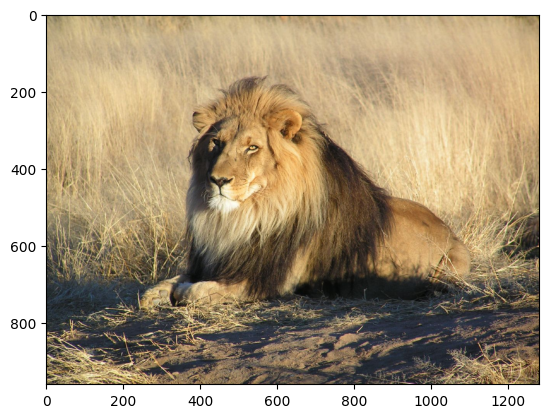

In [ ]:
img = Image.open("animal.jpg")
plt.imshow(img)

In [ ]:
from torchvision import transforms

In [ ]:
preprocess = transforms.Compose([
                                  transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(
                                      mean = [0.485, 0.456, 0.406],
                                      std = [0.255, 0.224, 0.225]
                                  )

])

In [ ]:
img_tensor = preprocess(img)

In [ ]:
img_tensor.shape

torch.Size([3, 224, 224])

In [ ]:
batch = img_tensor.unsqueeze(0)

In [ ]:
batch.shape

torch.Size([1, 3, 224, 224])

In [ ]:
from torchvision import models

In [ ]:
model = models.alexnet(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
y = model(batch.to(device))

In [ ]:
y.shape

torch.Size([1, 1000])

In [ ]:
y_max, index = torch.max(y,1)
print(index, y_max)

tensor([291], device='cuda:0') tensor([25.2823], device='cuda:0', grad_fn=<MaxBackward0>)


In [ ]:
url = "http://pytorch.tips/imagenet-labels"

In [ ]:
fname = "imagenet_class_labels.txt"

In [ ]:
urllib.request.urlretrieve(url, fname)

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x7f06c0f5d3c0>)

In [ ]:
with open("imagenet_class_labels.txt")as f:
  classes = [line.strip() for line in f.readlines()]

In [ ]:
print(classes[291])

291: 'lion, king of beasts, Panthera leo',


In [ ]:
prob = torch.nn.functional.softmax(y, dim = 1)[0]*100

In [ ]:
print(classes[index[0]],
      prob[index[0]].item())

291: 'lion, king of beasts, Panthera leo', 99.99652862548828


In [ ]:
_, indeces = torch.sort(y, descending = True)

In [ ]:
for idx in indeces[0][:5]:
  print(classes[idx], prob[idx].item())

291: 'lion, king of beasts, Panthera leo', 99.99652862548828
283: 'Persian cat', 0.0011195667320862412
154: 'Pekinese, Pekingese, Peke', 0.0006556728039868176
230: 'Shetland sheepdog, Shetland sheep dog, Shetland', 0.0005751944263465703
348: 'ram, tup', 0.00022192620963323861
